In [ ]:
# Imports and configurations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')

1. GarageType: Garage location
1. GarageCars: Size of garage in car capacity
  - GarageArea: Size of garage in square feet
  - These two are highly correlated

In [ ]:
df2 = df[['Neighborhood', 'GarageType', 'GarageCars', 'GarageArea', 'AdjSalePrice']]

df2

,Neighborhood,GarageType,GarageCars,GarageArea,AdjSalePrice
0,CollgCr,Attchd,2,548,398750.982473
1,Veenker,Attchd,2,460,401247.755503
2,CollgCr,Attchd,2,608,368453.793465
3,Crawfor,Detchd,3,642,307042.407728
4,NoRidge,Attchd,3,836,459555.010815
...,...,...,...,...,...
1455,Gilbert,Attchd,2,460,307101.075328
1456,NWAmes,Attchd,2,500,382687.537712
1457,Crawfor,Attchd,1,252,399864.532624
1458,NAmes,Attchd,1,240,236296.050474


In [ ]:
df2['GarageCars'].unique()

pvt = df2.pivot_table(index='GarageCars',columns='GarageArea', values='AdjSalePrice')
#g = sns.stripplot(data=df2, x="GarageCars", y="GarageArea", hue="AdjSalePrice", dodge=True)
#g.set(title="Garage Area vs. Garage Cars", xlabel='Garage Cars', ylabel='Garage Area (sqft)')

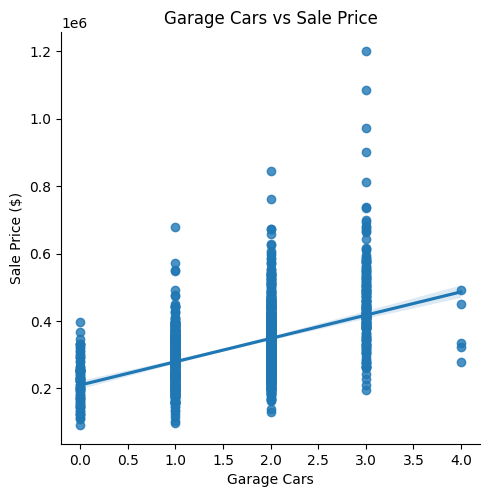

In [ ]:
sns.lmplot(data=df2, x='GarageCars', y='AdjSalePrice').set(
    title="Garage Cars vs Sale Price", xlabel='Garage Cars', ylabel='Sale Price ($)')

[Text(0.5, 1.0, '# Parking Spaces vs. Sale Price'),
 Text(0.5, 0, '# Parking Spaces'),
 Text(0, 0.5, 'Sale Price ($)')]

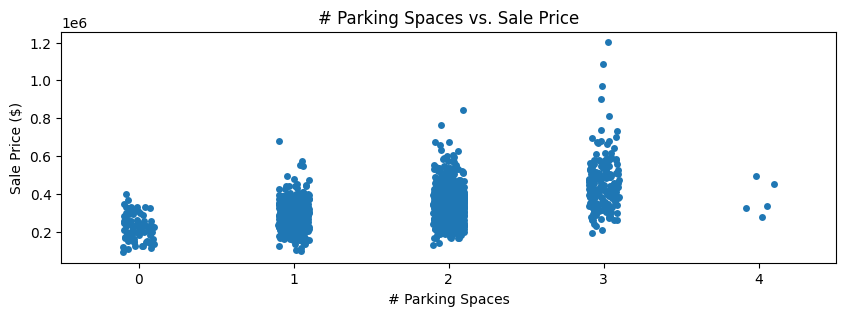

In [ ]:
plt.figure(figsize=(10, 3))

sns.stripplot(data=df2, x="GarageCars", y="AdjSalePrice", dodge=True).set(
    title="# Parking Spaces vs. Sale Price", xlabel='# Parking Spaces', ylabel='Sale Price ($)')

In [ ]:
df['GarageCars'].corr(df['AdjSalePrice'])

0.4734952908138252

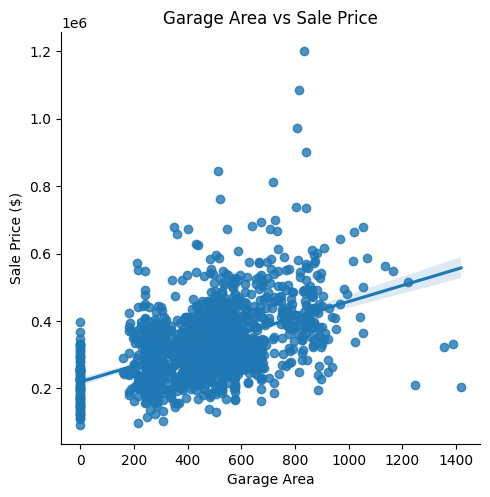

In [ ]:
sns.lmplot(data=df2, x='GarageArea', y='AdjSalePrice').set(
    title="Garage Area vs Sale Price", xlabel='Garage Area', ylabel='Sale Price ($)')

In [ ]:
df2.groupby('GarageCars')['AdjSalePrice'].mean()

GarageCars
0    223484.806561
1    287874.131203
2    334808.674711
3    454232.667190
4    375826.150341
Name: AdjSalePrice, dtype: float64

[Text(0.5, 1.0, '# of Parking Spaces vs. Sales Price by Neighborhood'),
 Text(95.72222222222221, 0.5, '# Parking Spaces'),
 Text(0.5, -12.777777777777782, 'Neighborhood')]

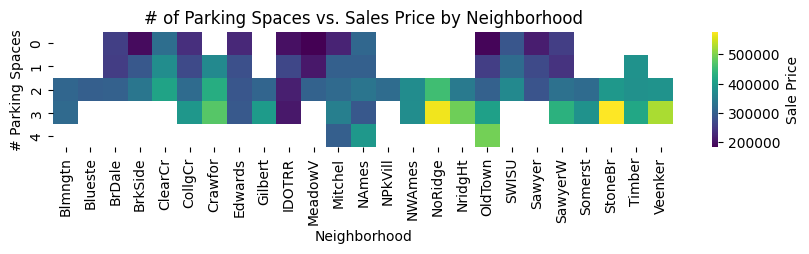

In [ ]:
plt.figure(figsize=(10, 1.5))

pvt = df2.pivot_table(index='GarageCars', columns='Neighborhood', values='AdjSalePrice')
sns.heatmap(data=pvt, cbar_kws={'label': 'Sale Price'}, cmap='viridis').set(
    title="# of Parking Spaces vs. Sales Price by Neighborhood", ylabel='# Parking Spaces', xlabel='Neighborhood')

,GrLivArea,GarageCars
GarageCars,,
0,1188.148148,0
1,1221.157182,1
2,1552.553398,2
3,2084.607735,3
4,1822.400000,4


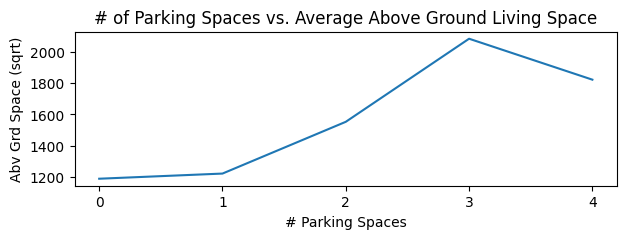

In [ ]:
df_cars_liv_area = pd.DataFrame(df.groupby('GarageCars')['GrLivArea'].mean())
df_cars_liv_area['GarageCars'] = df_cars_liv_area.index.values

plt.figure(figsize=(7, 2))
g = sns.lineplot(data=df_cars_liv_area, x='GarageCars', y='GrLivArea')

g.set(title="# of Parking Spaces vs. Average Above Ground Living Space", ylabel='Abv Grd Space (sqrt)', xlabel='# Parking Spaces')
g.set_xticks(df_cars_liv_area.index.values)

df_cars_liv_area

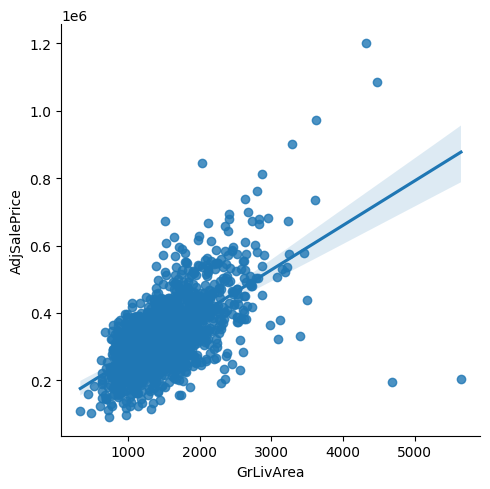

In [ ]:
sns.lmplot(data=df, x='GrLivArea', y='AdjSalePrice')

In [ ]:
df[df['GarageCars'] == 4][['GarageCars', 'GarageType']]

,GarageCars,GarageType
420,4,Attchd
747,4,Detchd
1190,4,2Types
1340,4,Detchd
1350,4,Detchd


In [ ]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

[Text(0, 0, '$394816.20'),
 Text(0, 0, '$353479.07'),
 Text(0, 0, '$334912.19'),
 Text(0, 0, '$316899.64'),
 Text(0, 0, '$293713.63'),
 Text(0, 0, '$248310.47')]

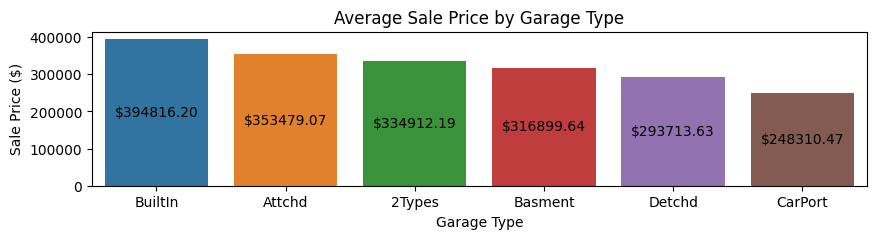

In [ ]:
data = pd.DataFrame(df.groupby('GarageType')['AdjSalePrice'].mean().sort_values(ascending=False))

data['GarageType'] = data.index.values

fig, ax = plt.subplots(figsize=(10, 2))

sns.barplot(data=data, x='GarageType', y='AdjSalePrice', ax=ax).set(
    title="Average Sale Price by Garage Type", xlabel='Garage Type', ylabel='Sale Price ($)')

ax.bar_label(ax.containers[-1], fmt='$%.2f', label_type='center')


array(['BuiltIn', '2Types', 'Attchd', 'Basment', 'CarPort', 'Detchd'],
      dtype=object)

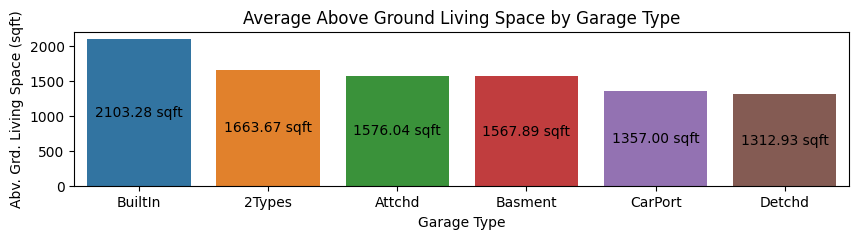

In [ ]:
data = pd.DataFrame(df.groupby('GarageType')['GrLivArea'].mean().sort_values(ascending=False))

data['GarageType'] = data.index.values

fig, ax = plt.subplots(figsize=(10, 2))

sns.barplot(data=data, x='GarageType', y='GrLivArea', ax=ax).set(
    title="Average Above Ground Living Space by Garage Type", xlabel='Garage Type', ylabel='Abv. Grd. Living Space (sqft)')

ax.bar_label(ax.containers[-1], fmt='%.2f sqft', label_type='center')

data.index.values

[Text(0, 0, '17251.50 sqft'),
 Text(0, 0, '11996.31 sqft'),
 Text(0, 0, '11674.33 sqft'),
 Text(0, 0, '11526.17 sqft'),
 Text(0, 0, '10433.79 sqft'),
 Text(0, 0, '8421.86 sqft')]

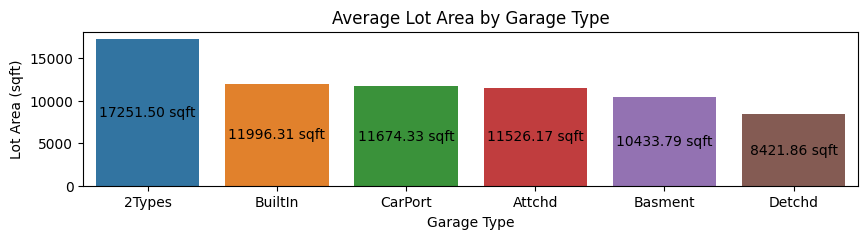

In [ ]:
data = pd.DataFrame(df.groupby('GarageType')['LotArea'].mean().sort_values(ascending=False))

data['GarageType'] = data.index.values

fig, ax = plt.subplots(figsize=(10, 2))

sns.barplot(data=data, x='GarageType', y='LotArea', ax=ax).set(
    title="Average Lot Area by Garage Type", xlabel='Garage Type', ylabel='Lot Area (sqft)')

ax.bar_label(ax.containers[-1], fmt='%.2f sqft', label_type='center')

<Axes: xlabel='Neighborhood', ylabel='AdjSalePrice'>

<Figure size 2500x800 with 0 Axes>

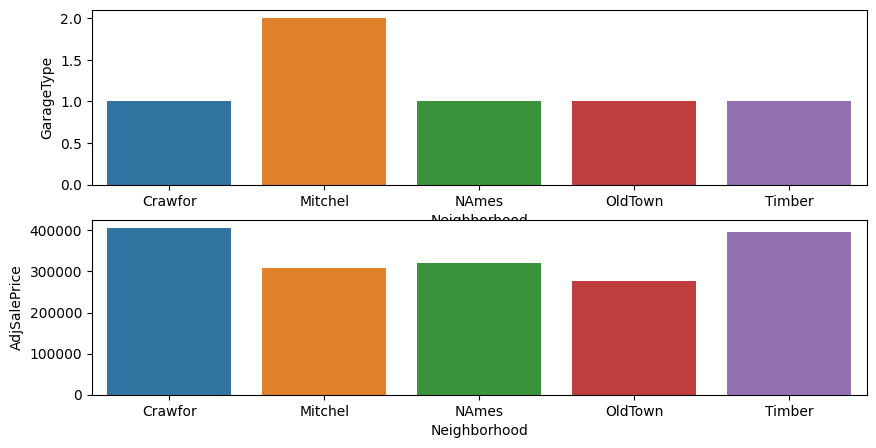

In [ ]:
plt.figure(figsize=(25, 8))

df_2types = df[df['GarageType'] == '2Types']

df_2types_count = pd.DataFrame(df_2types.groupby('Neighborhood')['GarageType'].count())
df_2types_count['Neighborhood'] = df_2types_count.index.values

df_neighorboods = df[df['Neighborhood'].isin(['Crawfor', 'Mitchel', 'NAmes', 'OldTown', 'Timber'])]

df_neighorboods_mean = pd.DataFrame(df_neighorboods.groupby('Neighborhood')['AdjSalePrice'].mean())
df_neighorboods_mean['Neighborhood'] = df_neighorboods_mean.index.values

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
sns.barplot(data=df_2types_count, x='Neighborhood', y='GarageType', ax=ax1)
sns.barplot(data=df_neighorboods_mean, x='Neighborhood', y='AdjSalePrice', ax=ax2)

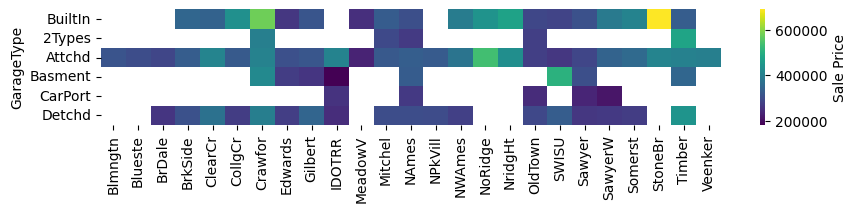

In [80]:
plt.figure(figsize=(10, 1.5))

pvt = df.pivot_table(index='GarageType', columns='Neighborhood', values='AdjSalePrice')

order = pd.DataFrame({'GarageType': ['BuiltIn', '2Types', 'Attchd', 'Basment', 'CarPort', 'Detchd'], 'order': [1, 2, 3, 4, 5, 6]})

pvt_ordered = pvt.merge(order, how='left', on=['GarageType'])
pvt_ordered.sort_values(by=['order'], inplace=True)
pvt_ordered.drop(columns=['order'], inplace=True)
pvt_ordered.set_index('GarageType', inplace=True)
#pvt_ordered.reset_index(inplace=True)

chart = sns.heatmap(data=pvt_ordered, cbar_kws={'label': 'Sale Price'}, cmap='viridis')
#chart.set(title="# of Parking Spaces vs. Sales Price by Neighborhood", ylabel='# Parking Spaces', xlabel='Neighborhood')

In [74]:
df.groupby('GarageType')['GarageType'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

In [82]:
pvt_ordered.drop(index=['2Types', 'Basment', 'CarPort'], inplace=True)

[Text(0.5, 1.0, 'Garage Type vs. Sales Price by Neighborhood'),
 Text(95.72222222222221, 0.5, 'Garage Type'),
 Text(0.5, -18.27777777777778, 'Neighborhood')]

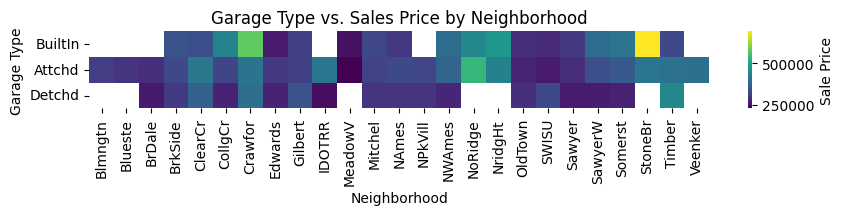

In [86]:
plt.figure(figsize=(10, 1))

chart = sns.heatmap(data=pvt_ordered, cbar_kws={'label': 'Sale Price'}, cmap='viridis')
chart.set(title="Garage Type vs. Sales Price by Neighborhood", ylabel='Garage Type', xlabel='Neighborhood')

In [87]:
pvt_ordered

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
GarageType,,,,,,,,,,,,,,,,,,,,,
BuiltIn,NaN,NaN,NaN,347035.713477,339595.602752,434938.956501,577673.623312,262402.931327,316105.446024,NaN,...,442779.074317,474188.205675,290381.640075,284590.973519,307027.786045,389466.539067,408755.879580,689856.538161,329625.282939,NaN
Attchd,313567.719847,300510.202503,288503.495406,328989.398956,410999.607223,322928.068535,405994.682303,305042.118776,316861.984823,409254.394748,...,536464.457419,430775.519355,275732.506270,262305.126498,288168.646878,340407.727332,355972.908636,410943.935543,401941.988695,398270.613353
Detchd,NaN,NaN,260497.203790,307955.003037,371147.145051,272746.296765,396203.285673,273911.643217,345584.206904,245443.118748,...,NaN,NaN,291473.046051,329116.588859,262648.059645,265206.496421,271972.408120,NaN,444686.293885,NaN
